# Homework 03 - Python introduction

### Exercise 1 - Terminology

Describe the following terms with your own words:

***Function:*** is kind of container which bundles a set of code which is organized for performing a single, related action. 

***Variable:*** used in code as placeholder for information/values to be assigned. It is also a location created to store values of different types of data. Data in integers, decimals or characters can be stored in these variables.

***Calling a function:*** when a structure of codes inside a function is finalized, the function can be executed by calling it.

***String:*** a text format/character type contrary to e.g. numbers

### Exercise 2 - spurious correlations

Reproduce a *spurious correlations* plot using `plt.plot()`.

Plot the time series `sociology_doctorates` and `space_launches` on a relative scale, i.e. as percentage of the last data point (i.e. years on the x-axis, relative data on the y-axis, the last data point in both time series should be 100%). Add a second plot which displays the relation between both data sets as scatter plot by using `plt.plot(dataset1, dataset2, 'o')` (data set 1 on x-axis, data set 2 on y-axis absolute units, not percentage).

Instead using the given time series, you can also use any other spurious correlation, if you want to search a different dataset.

Analyze both plots, come up with a wrong conclusion and explain why it is wrong.

Don't forget to label the axis!

![Spurious correlations](spurious-correlations.svg)

Source: https://www.tylervigen.com/spurious-correlations

In [2]:
sociology_doctorates = [601, 579, 572, 617, 566, 547, 597, 580, 536, 579, 576, 601, 664]
space_launches = [54, 46, 42, 50, 43, 41, 46, 39, 37, 45, 45, 41, 54]
years = list(range(1997, 2009 + 1))

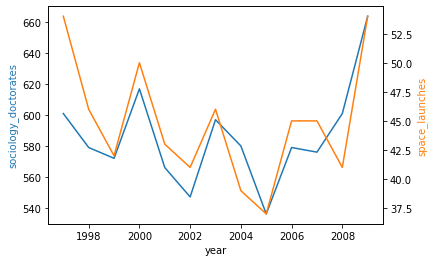

In [15]:
### alternative solution try (PeterZ)

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

plt.plot (years, sociology_doctorates)
ax.set_ylabel ("sociology_doctorates", color = "C10")
plt.xlabel('year')

ax2 = ax.twinx()
ax2.set_ylabel ("space_launches", color = "C1")
plt.plot (years, space_launches, color = "C1")


### following will add percent instead of absolute values

In [7]:
import math
def percentSD(sociology_doctorates):
    percentSD = []
    for i in range(len(sociology_doctorates)):
        perSD = sociology_doctorates[i]*100/sociology_doctorates[-1]
        percentSD.append(perSD)
    return percentSD

In [8]:
def percentSL(space_launches):
    percentSL = []
    for i in range(len(space_launches)):
        perSL = space_launches[i]*100/space_launches[-1]
        percentSL.append(perSL)
    return percentSL

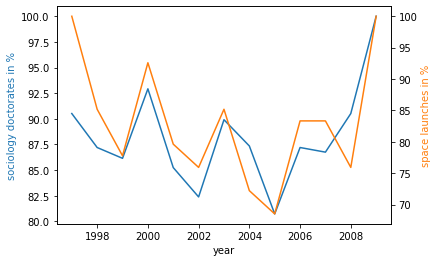

In [17]:
### alternative solution try (PeterZ) used for percentage

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

plt.plot (years, percentSL(sociology_doctorates))
ax.set_ylabel ("sociology doctorates in %", color = "C10")
plt.xlabel('year')

ax2 = ax.twinx()
ax2.set_ylabel ("space launches in %", color = "C1")
plt.plot (years, percentSL(space_launches), color = "C1")


In [18]:
# calculate relative percentages of sociology-doctorates
Percent_SD = []
for value in sociology_doctorates:
    perc = value*100.0/sociology_doctorates[-1]
    Percent_SD.append(perc)

print(Percent_SD)

[90.51204819277109, 87.1987951807229, 86.144578313253, 92.92168674698796, 85.24096385542168, 82.37951807228916, 89.90963855421687, 87.34939759036145, 80.72289156626506, 87.1987951807229, 86.74698795180723, 90.51204819277109, 100.0]


In [19]:
# calculate cumulative percentages of space_launches
Percent_SL = []
for value in space_launches:
    perc = value*100.0/space_launches[-1]
    Percent_SL.append(perc)

print(Percent_SL)

[100.0, 85.18518518518519, 77.77777777777777, 92.5925925925926, 79.62962962962963, 75.92592592592592, 85.18518518518519, 72.22222222222223, 68.51851851851852, 83.33333333333333, 83.33333333333333, 75.92592592592592, 100.0]


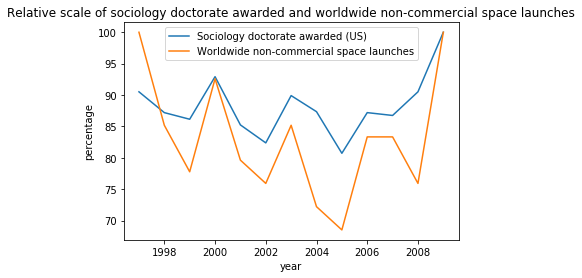

In [20]:
import matplotlib.pyplot as plt
plt.plot(years,Percent_SD, label = 'Sociology doctorate awarded (US)')
plt.plot(years,Percent_SL, label = 'Worldwide non-commercial space launches')
plt.xlabel('year')
plt.ylabel('percentage')
plt.title('Relative scale of sociology doctorate awarded and worldwide non-commercial space launches')
plt.legend()
plt.show()

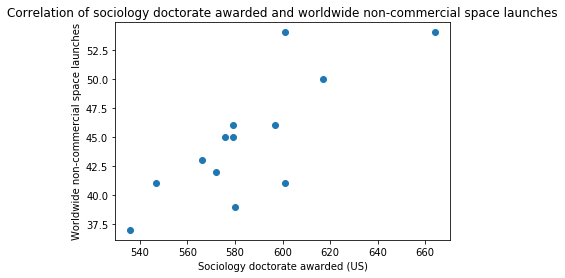

In [8]:
plt.plot(sociology_doctorates,space_launches, 'o')
plt.xlabel('Sociology doctorate awarded (US)')
plt.ylabel('Worldwide non-commercial space launches')
plt.title('Correlation of sociology doctorate awarded and worldwide non-commercial space launches')
plt.show()

### Wrong conclusion

The correlation rate is very high.
So either the rate of awarded social doctorly awards depends highly on the worldwide non-commercial space launches,
or contrariwise, the non-commercial space launces are depending on awarded socialy doctors.
This high correlation must indicate a direct causal influence.

Alternative interpretations:
Altough the correlation is very high, it doesn't mean there is a direct causal relationship.
There could be a third parameter, that influences both, socaly awarded doctors and non-commercial space flights,
for example how much money the government has to put in it's buget.

Or there is an moderating parameter, for example a social trend, like the willingness to put money in sciences,
which doesn't influence the amount of money a government has, but the way the government uses it.

### Exercise 3 - Flatten the curve

Use the logistic growth model to plot an oversimplified version of the [#flattenthecurve](https://www.biospace.com/getasset/fc2b8ad6-697f-49d5-827e-50f4901baf53/) [graphs](https://evilspeculator.com/wp-content/uploads/2020/03/flattenthecurve.jpg).

Write a function `new_infections(t, k)` which returns the number of new infections given by the following formula:

$i_{\textrm{new}}(t):=\frac{e^\left(-k \cdot P \cdot t\right) \cdot k \cdot P^2 \cdot \left(-1 + \frac{P}{i_0}\right)}{\left(1 + e^\left(-k \cdot P \cdot t \right) \cdot \left(-1 + \frac{P}{i_0}\right) \right)^2}$

Plot the number of infections for $t=0,\ldots,250$, $P=1\,000\,000$, $i_0=1$ and $k= \frac{3}{P \cdot 10}$.

Also add a horizontal line and label it with "healthcare system capacity".

Then analyze the plot for different values of $k$ and explain in detail why one should not use this model/plot to predict the outcome of an epidemic.

Bonus question: Is there something one can still learn from it?

##### Motivation

The motivation is not important for the programming task. There is no need to understand all details in order to do the exercise.

For a fixed population with $P$ individuals, $i(t)$ is the number of infections at time $t$. We assume that every individual stays infectious once infected. 

Choosing a random pair of individuals from the population, a new infection will take place with probability $2 \cdot \frac{i(t)}{P} \cdot \frac{P - i(t)}{P}$. If we assume that every infected individual will meet approximately $c$ others in every time step (and infect them if they are not yet infected), there is a total number of contacts $\frac{c \cdot P}{2}$ in every time step. That means we expect a total number of new infections:

$i_{\textrm{new}}(t) = \frac{c \cdot P}{2} \cdot 2 \cdot \frac{i(t)}{P} \cdot \frac{P - i(t)}{P} = \underbrace{\frac{c}{P}}_{=:k} \cdot \left(i(t) \cdot \left(P - i(t)\right) \right)$

This leads to the differential equation:

$i'(t) = i_{\textrm{new}}(t) = k \cdot \left(i(t) \cdot \left(P - i(t)\right) \right)$

A solution is given by:

$i(t) = \frac{P}{\left(1 + e^\left(-k \cdot P \cdot t \right) \cdot \left(\frac{P}{i_0} - 1\right)\right)}$

Differentiating $i(t)$ gives the number of new infections:

$i_{\textrm{new}}(t):=i'(t) = \frac{e^\left(-k \cdot P \cdot t\right) \cdot k \cdot P^2 \cdot \left(-1 + \frac{P}{i_0}\right)}{\left(1 + e^\left(-k \cdot P \cdot t \right) \cdot \left(-1 + \frac{P}{i_0}\right) \right)^2}$


[3blue1brown](https://www.youtube.com/watch?v=gxAaO2rsdIs) has a great video on the topic. If you are interested in a model which is a bit closer to the real world, but still quite simple, have a look at the [SIR model](https://www.youtube.com/watch?v=Qrp40ck3WpI). A large part of this is inspired by the [German Wikipiedia page](https://de.wikipedia.org/wiki/Logistische_Funktion).

##### Solution

Write your code here:

In [2]:
import math
P=1000000
k=3/(P*10)
i_0=1
capacity=40000 #hospital places
def new_infections(t,k):
    number=math.exp(-k*P*t)*k*P**2*(-1+P/i_0)/((1+math.exp(-k*P*t)*(-1+P/i_0))**2)
    return number

In [3]:
new_infections (0,k)

0.2999997

In [3]:
newinfect=[]
time=range(0,251)
for t in time:
    #print(new_infections(t,k)) #testline
    newinfect.append(new_infections(t,k))

<IPython.core.display.Javascript object>


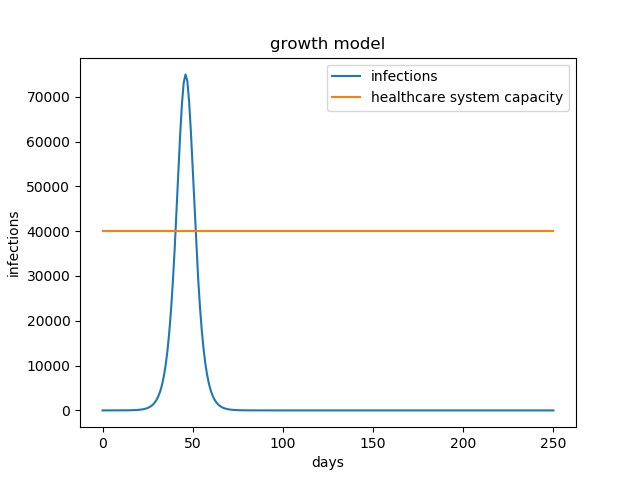

In [4]:
import matplotlib.pyplot as plt
plt.plot(newinfect,label = 'infections')
plt.plot([capacity]*len(time),label = 'healthcare system capacity')
plt.xlabel('days')
plt.ylabel('infections')
plt.title('growth model')
plt.legend()
plt.show()
# TO GET THIS GRAPH AFTER INTERACTIVE VIEW ON THE GRAPH BELOW YOU HAVE TO RESTART THE KERNEL 

##### Bonus: Interactive plot

If you want an interactive widget to control the parameter c, you can use the following code.

**Warning:** After running `%matplotlib notebook` you cannot plot in other cells any longer. Restart the Jupyter kernel and refresh the browser window to disable again.

```Python
%matplotlib notebook
from ipywidgets import interact

line, = plt.plot(x, y)

# write here more plotting code (axis label etc)

def update(c=3.0/10.):
    line.set_ydata([new_infections(t, c  / P) for t in time_range])

interact(update);
```

<IPython.core.display.Javascript object>


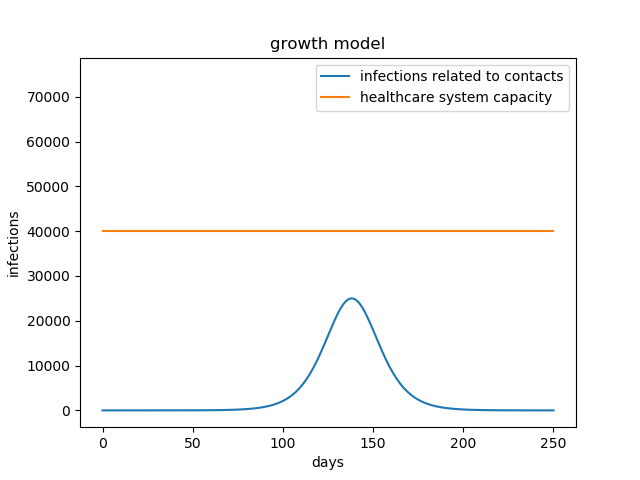

interactive(children=(FloatSlider(value=0.3, description='c', max=0.8999999999999999, min=-0.3), Output()), _d…

In [5]:
%matplotlib notebook
from ipywidgets import interact
line, = plt.plot(newinfect,label = 'infections related to contacts')
plt.plot([capacity]*len(time),label = 'healthcare system capacity')
plt.xlabel('days')
plt.ylabel('infections')
plt.title('growth model')
plt.legend()
def update(c=3.0/10.):
    line.set_ydata([new_infections(t, c / P) for t in time])

interact(update);

### Exercise 4 - Fibonacci 

Write a function `fibonacci(n)` which calculates the n-th [Fibonacci number](https://en.wikipedia.org/wiki/Fibonacci_number), defined by $f(0)=0$, $f(1)=1$ and $f(n) = f(n-1)+f(n-2)$.

Use the function to calculate $f(100)$.

In [26]:
def fibonacci(n):
    if n<0:
        print("incorrect input")
    elif n==0:
        return 0
    elif n==1:
        return 1
    else:
        return fibonacci(n-1)+fibonacci(n-2)

In [27]:
print(fibonacci(20))

6765


#### another version with iteration, because it is faster

In [6]:
def fib(n): 
    a,b = 0,1
    for i in range(0,n): 
        a,b = b,a+b 
    return a

In [16]:
fib(100)

354224848179261915075

In [17]:
fib(1000)

43466557686937456435688527675040625802564660517371780402481729089536555417949051890403879840079255169295922593080322634775209689623239873322471161642996440906533187938298969649928516003704476137795166849228875

In [19]:
print(fib(0),fib(1),fib(2),fib(3))

0 1 1 2
